# ● XGBoost 모델 학습 준비

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
train_data = pd.read_csv('/home/encore/SKN07-2nd-3Team-main/data/churn-bigml-80.csv')
test_data = pd.read_csv('/home/encore/SKN07-2nd-3Team-main/data/churn-bigml-20.csv')

# 범주형 변수 인코딩
label_encoders = {}
categorical_columns = ['International plan', 'Voice mail plan', 'Churn']
for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

# 수치형 변수 표준화
scaler = StandardScaler()
numerical_columns = [
    'Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge',
    'Total intl minutes', 'Total intl calls', 'Total intl charge',
    'Customer service calls'
]

train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

In [2]:
# 특성과 타겟 변수 분리
X_train = train_data.drop(columns=['Churn', 'State', 'Area code'], axis=1)
y_train = train_data['Churn']
X_test = test_data.drop(columns=['Churn', 'State', 'Area code'], axis=1)
y_test = test_data['Churn']

# ● 모델 학습

In [3]:
# XGBoost 모델 초기화
xgb_model = xgb.XGBClassifier()

# 훈련 데이터로 학습
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# ● 예측 및 평가

In [4]:
# 예측 수행
y_pred = xgb_model.predict(X_test)

# 평가 결과 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without Tuning: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy without Tuning: 0.9565

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       572
           1       0.93      0.75      0.83        95

    accuracy                           0.96       667
   macro avg       0.95      0.87      0.90       667
weighted avg       0.96      0.96      0.95       667



# ● 피처 중요도 확인

## ○ 피처 중요도 출력

In [5]:
# 피처 중요도 추출
feature_importances = xgb_model.feature_importances_

# 중요도를 데이터프레임 형태로 정리
importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # 특성 이름
    'Importance': feature_importances  # 중요도 값
}).sort_values(by='Importance', ascending=False)  # 중요도 기준으로 내림차순 정렬

# 중요도 데이터 출력
print(importance_df)

                   Feature  Importance
1       International plan    0.239708
2          Voice mail plan    0.142500
16  Customer service calls    0.140666
4        Total day minutes    0.087359
14        Total intl calls    0.082609
7        Total eve minutes    0.054908
13      Total intl minutes    0.054143
9         Total eve charge    0.037086
10     Total night minutes    0.031606
3    Number vmail messages    0.028473
5          Total day calls    0.023270
11       Total night calls    0.022657
0           Account length    0.022632
12      Total night charge    0.016250
8          Total eve calls    0.016133
6         Total day charge    0.000000
15       Total intl charge    0.000000


## ○ 피처 중요도 시각화

/tmp/ipykernel_1771/736710203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


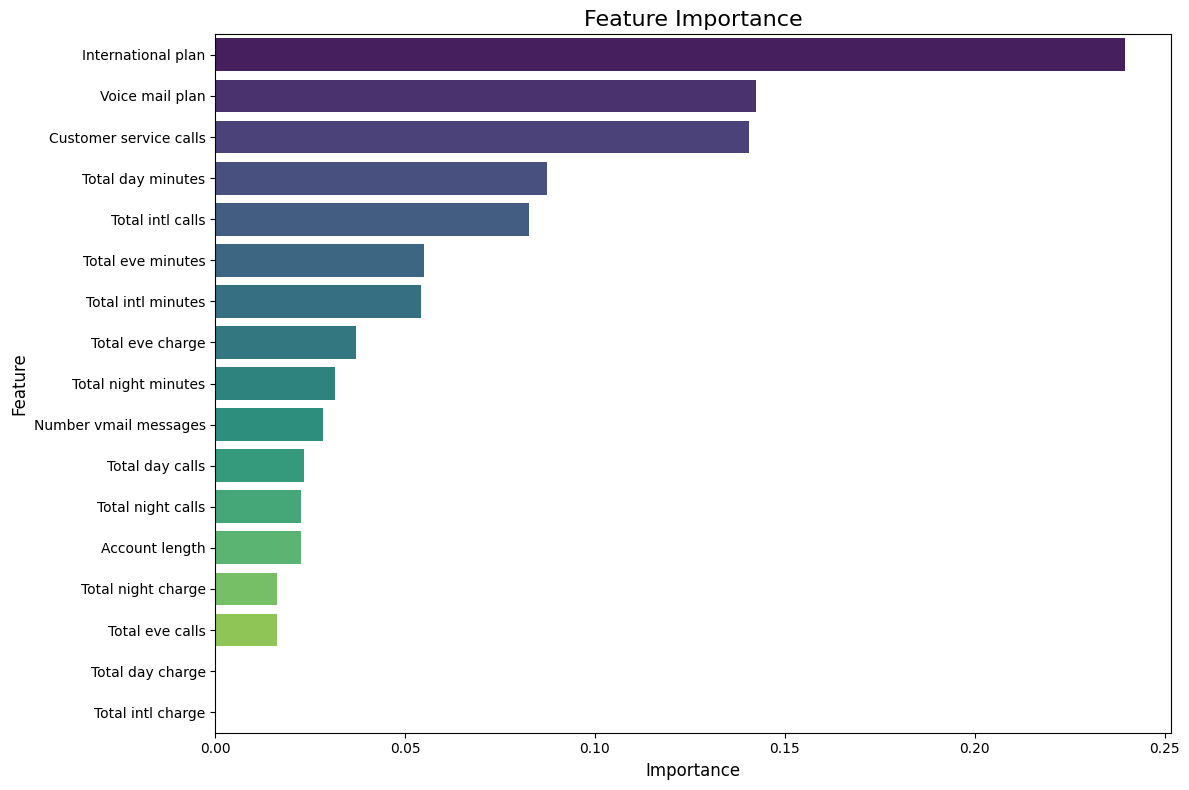

In [6]:
# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# ● 예측 정확도 확인

In [7]:
print(f"예측 정확도: {accuracy:.4f}")

예측 정확도: 0.9565
